In [1]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [4]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [5]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [6]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

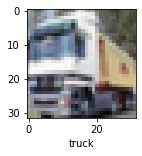

In [7]:
plot_sample(X_train, y_train, 1)

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train,epochs=5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/5
1563/1563 [==============================] - 181s 113ms/step - loss: 1.8120 - accuracy: 0.3539
Epoch 2/5
1563/1563 [==============================] - 180s 115ms/step - loss: 1.6245 - accuracy: 0.4259
Epoch 3/5
1563/1563 [==============================] - 183s 117ms/step - loss: 1.5404 - accuracy: 0.4580
Epoch 4/5
1563/1563 [==============================] - 188s 121ms/step - loss: 1.4815 - accuracy: 0.4781
Epoch 5/5
1563/1563 [==============================] - 180s 115ms/step - loss: 1.4298 - accuracy: 0.4975


In [12]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 15s 41ms/step - loss: 1.4588 - accuracy: 0.4819


[1.4588087797164917, 0.48190000653266907]

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test,y_pred_classes))

313/313 [==============================] - 12s 38ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.69      0.57      1000
           1       0.71      0.40      0.51      1000
           2       0.43      0.24      0.31      1000
           3       0.33      0.43      0.37      1000
           4       0.46      0.35      0.40      1000
           5       0.50      0.27      0.35      1000
           6       0.40      0.72      0.51      1000
           7       0.62      0.49      0.55      1000
           8       0.68      0.54      0.60      1000
           9       0.47      0.69      0.56      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.47     10000
weighted avg       0.51      0.48      0.47     10000



In [20]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

cnn.fit(X_train, y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 108s 68ms/step - loss: 1.3834 - accuracy: 0.5011
Epoch 2/10
1563/1563 [==============================] - 107s 69ms/step - loss: 1.0069 - accuracy: 0.6453
Epoch 3/10
1563/1563 [==============================] - 107s 69ms/step - loss: 0.8263 - accuracy: 0.7104
Epoch 4/10
1563/1563 [==============================] - 114s 73ms/step - loss: 0.6646 - accuracy: 0.7656
Epoch 5/10
1563/1563 [==============================] - 111s 71ms/step - loss: 0.5114 - accuracy: 0.8226
Epoch 6/10
1563/1563 [==============================] - 112s 71ms/step - loss: 0.3675 - accuracy: 0.8737
Epoch 7/10
1563/1563 [==============================] - 111s 71ms/step - loss: 0.2484 - accuracy: 0.9155
Epoch 8/10
1563/1563 [==============================] - 109s 70ms/step - loss: 0.1791 - accuracy: 0.9376
Epoch 9/10
1563/1563 [==============================] - 108s 69ms/step - loss: 0.1304 - accuracy: 0.9557
Epoch 10/10
1563/1563 [==============================] 

In [22]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 7s 22ms/step - loss: 1.7216 - accuracy: 0.6845


[1.7216242551803589, 0.684499979019165]

In [23]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

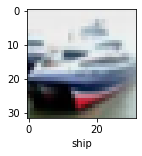

In [24]:
plot_sample(X_test,y_test,1)

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 7s 20ms/step


array([[4.4408858e-07, 3.1334590e-10, 3.5394976e-06, 5.8504380e-02,
        4.9745452e-10, 9.4088650e-01, 6.0521200e-04, 1.4918199e-12,
        1.5504087e-10, 2.5126557e-15],
       [2.9059427e-04, 3.6215896e-03, 4.4013001e-15, 4.2042923e-12,
        1.6685379e-16, 8.2438706e-17, 2.8580323e-15, 5.1708789e-18,
        9.9608684e-01, 9.5260327e-07],
       [5.4837864e-02, 1.3328098e-03, 4.7870340e-05, 8.5879721e-05,
        2.3444158e-03, 5.1878706e-06, 4.7991630e-06, 2.7166291e-03,
        9.3541992e-01, 3.2047604e-03],
       [9.9298394e-01, 1.0496237e-09, 5.4724123e-03, 1.7584288e-06,
        2.9678386e-05, 1.0870725e-10, 2.7590428e-12, 7.2727502e-10,
        1.5121809e-03, 1.1929412e-10],
       [2.1887116e-13, 2.9311183e-08, 2.0111317e-03, 2.5519428e-03,
        9.7155994e-01, 3.6232731e-07, 2.3876565e-02, 2.2772056e-10,
        9.8158244e-13, 3.1069911e-13]], dtype=float32)

In [26]:
np.argmax(y_pred[0])

5

In [28]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 8, 0, 4]

In [29]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

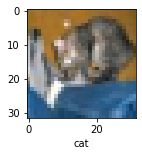

In [37]:
plot_sample(X_test,y_test,0)

In [38]:
classes[y_classes[0]]

'dog'

In [39]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.76      0.73      1000
           1       0.84      0.78      0.81      1000
           2       0.61      0.56      0.58      1000
           3       0.44      0.53      0.48      1000
           4       0.68      0.62      0.64      1000
           5       0.55      0.60      0.57      1000
           6       0.74      0.78      0.76      1000
           7       0.74      0.74      0.74      1000
           8       0.85      0.75      0.80      1000
           9       0.77      0.73      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.69     10000
weighted avg       0.69      0.68      0.69     10000

